# Getting Started in Machine Learning
### Chapter 10: Logistic Regression
This notebook contains examples from the book:

Getting Started in Machine Learning: Easy Recipes for Python 3, Scikit-Learn, Jupyter (2019) by Bella Romeo, Sherwood Forest Books, Los Angeles, CA, USA, ISBN-13: 978-0-9966860-6-8

(c) Copyright 2019.

<font style="font-size:xx-small; font-family:courier;">

    This notebook is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program. If not, see <https://www.gnu.org/licenses/>.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
                 header=None,na_values="?")
data.columns=("mpg","cyl","displ","hp","weight","accel","model","origin","carname")
data = data.dropna(axis=0)
print(data[:5])

    mpg  cyl  displ     hp  weight  accel  model  origin  \
0  18.0    8  307.0  130.0  3504.0   12.0     70       1   
1  15.0    8  350.0  165.0  3693.0   11.5     70       1   
2  18.0    8  318.0  150.0  3436.0   11.0     70       1   
3  16.0    8  304.0  150.0  3433.0   12.0     70       1   
4  17.0    8  302.0  140.0  3449.0   10.5     70       1   

                       carname  
0  "chevrolet chevelle malibu"  
1          "buick skylark 320"  
2         "plymouth satellite"  
3              "amc rebel sst"  
4                "ford torino"  


2016 average fuel economy is 24.7 mpg
https://www.reuters.com/article/us-autos-emissions/u-s-vehicle-fuel-economy-rises-to-record-24-7-mpg-epa-idUSKBN1F02BX
downloaded 14 Dec 2018

In [3]:
mpg2016=24.7

In [4]:
weight=data["weight"]
mpg=data["mpg"]

In [5]:
gas_guzzler=[1 if z<mpg2016 else 0 for z in mpg]

Text(0,0.5,'1=Gas Guzzler; 0=Not')

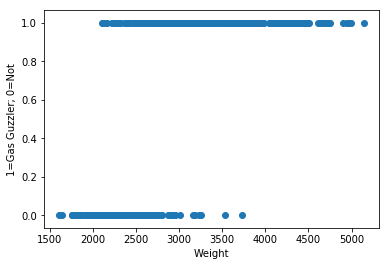

In [6]:
plt.scatter(weight,gas_guzzler)
plt.xlabel("Weight")
plt.ylabel("1=Gas Guzzler; 0=Not")
#fig=plt.gcf()
#fig.savefig("gas-guzzler-vs-weight-figure.pdf")

In [7]:
X=np.array(weight).reshape(-1,1)
Y=np.array(gas_guzzler)

In [8]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [9]:
XTRAIN,XTEST,YTRAIN,YTEST=train_test_split(X,Y)

In [10]:
r=LR().fit(XTRAIN,YTRAIN)

In [11]:
b=r.coef_[0,0]
a=r.intercept_[0]
x0=-a/b
print("a (intercept)=",a)
print("b (slope)=",b)
print("x0 (50% point)=",x0)

a (intercept)= -4.537362070802312
b (slope)= 0.001746532605435468
x0 (50% point)= 2597.9257740058047


In [12]:
xvals=np.linspace(1500,5500,100)
def flogistic(x,a,b):
    return 1/(1+np.exp(-(a+b*x)))
yvals=flogistic(xvals,a,b)

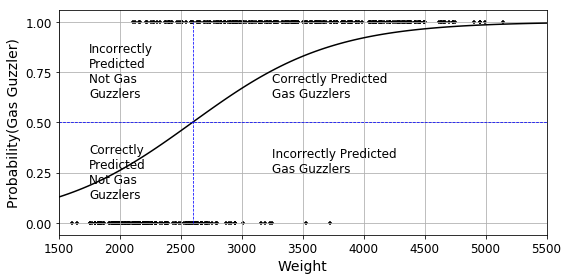

In [13]:
plt.plot(xvals,yvals, c="k")
plt.scatter(weight,gas_guzzler,s=15,c="k",marker="+")
plt.plot([1000,5500], [.5,.5],c="blue",ls="--",lw=.75)
plt.plot([x0,x0],[0,1],c="blue",ls="--",lw=.75)
plt.xlim([1500,5500])
plt.yticks([0,.25, .5, .75, 1])
plt.grid()
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12)
plt.xlabel("Weight", fontsize=14)
plt.ylabel("Probability(Gas Guzzler)", fontsize=14);
plt.text(3250,.625,"Correctly Predicted\nGas Guzzlers", fontsize=12);
plt.text(3250,.25,"Incorrectly Predicted\nGas Guzzlers",fontsize=12)
plt.text(1750,.625,"Incorrectly\nPredicted\nNot Gas\nGuzzlers",
         fontsize=12);
plt.text(1750,.125,
         "Correctly\nPredicted\nNot Gas\nGuzzlers",fontsize=12);
fig=plt.gcf()
fig.set_size_inches(8,4)
fig.tight_layout()
#fig.savefig("figure-logistic-onevar-gasguzzler-probability.pdf")

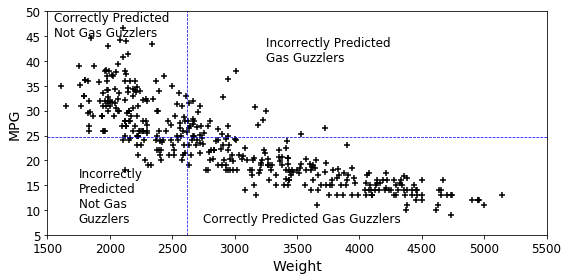

In [31]:
plt.scatter(weight,mpg,marker="+",c="k")
plt.plot([1500,5500],[mpg2016,mpg2016], c="blue",ls="--",lw=.75)
plt.plot([x0,x0],[5,50],c="blue",ls="--",lw=.75)
plt.xlim([1500,5500]);
plt.ylim([5,50]);
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12)
plt.xlabel("Weight", fontsize=14)
plt.ylabel("MPG", fontsize=14);
plt.text(2750,7.5,"Correctly Predicted Gas Guzzlers", fontsize=12);
plt.text(3250,40,"Incorrectly Predicted\nGas Guzzlers",fontsize=12)
plt.text(1750,7.5,"Incorrectly\nPredicted\nNot Gas\nGuzzlers",fontsize=12);
plt.text(1550,45,"Correctly Predicted\nNot Gas Guzzlers",fontsize=12);
fig=plt.gcf()
fig.set_size_inches(8,4)
fig.tight_layout()
#fig.savefig("figure-logistic-onevar-gasguzzler-mpg-vs-weight-confusion.pdf")

## Multiple Feature Logistic regression


In [15]:
xdata=data[["displ","hp","weight","accel"]]
X2=np.array(xdata)
X2TRAIN,X2TEST,Y2TRAIN,Y2TEST=train_test_split(xdata,Y)

In [16]:
r2=LR().fit(X2TRAIN, Y2TRAIN)

In [17]:
b=r2.coef_
a=r2.intercept_

print("a (intercept)=",a)
print("b (slope)=",b)


a (intercept)= [-0.2392631]
b (slope)= [[ 0.01192084 -0.02142693  0.00248871 -0.38355612]]


In [18]:
Y2P=r2.predict(X2TEST) #multiple feature prediction

In [19]:
YP=r.predict(XTEST) # single feature prediction

In [20]:
accuracy_score(Y2P,Y2TEST), accuracy_score(YP,YTEST)

(0.8571428571428571, 0.8571428571428571)

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix(YTEST,YP)

array([[31,  4],
       [10, 53]])

In [23]:
confusion_matrix(Y2TEST,Y2P)

array([[38,  6],
       [ 8, 46]])

In [24]:
pX=r.predict_proba(XTEST)[:,1]
pX2=r2.predict_proba(X2TEST)[:,1]

In [25]:
from sklearn.metrics import roc_curve

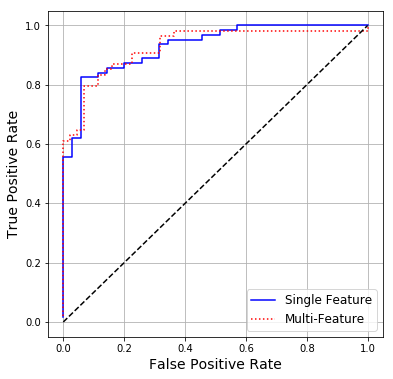

In [26]:
fpr, tpr, threshold = roc_curve(YTEST, pX)
fpr2, tpr2, threshold2=roc_curve(Y2TEST,pX2)
plt.plot(fpr,tpr,c="blue",label="Single Feature")
plt.plot(fpr2,tpr2,c="red",ls=":",label="Multi-Feature")
plt.plot([0,1],[0,1],c="k",ls="--")
plt.legend(fontsize=12)
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.grid()
fig=plt.gcf()
fig.set_size_inches(6,6)
#fig.savefig("ROC-curve-gas-guzzler-logistic.pdf")